<a href="https://colab.research.google.com/github/SHIVASAI16256/AIML_LAB/blob/main/Copy_of_AIML_CLASS_DATASET_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/drive/MyDrive/SML AIML ASSIGNMENTS/AI-ML PROJECT/ott movies.csv";
df = pd.read_csv(path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ID                           Title  Year  Age  IMDb Rotten Tomatoes  \
0   1                       Inception  2010  13+   8.8             87%   
1   2                      The Matrix  1999  18+   8.7             87%   
2   3          Avengers: Infinity War  2018  13+   8.5             84%   
3   4              Back to the Future  1985   7+   8.5             96%   
4   5  The Good, the Bad and the Ugly  1966  18+   8.8             97%   

   Netflix  Hulu  Prime Video  Disney+  Type                       Directors  \
0      1.0     0            0        0     0               Christopher Nolan   
1      1.0     0            0        0     0  Lana Wachowski,Lilly Wachowski   
2      1.0     0            0        0     0         Anthony Russo,Joe Russo   
3      1.0     0            0        0     0                 Robert Zemeckis   
4      1.0     0          

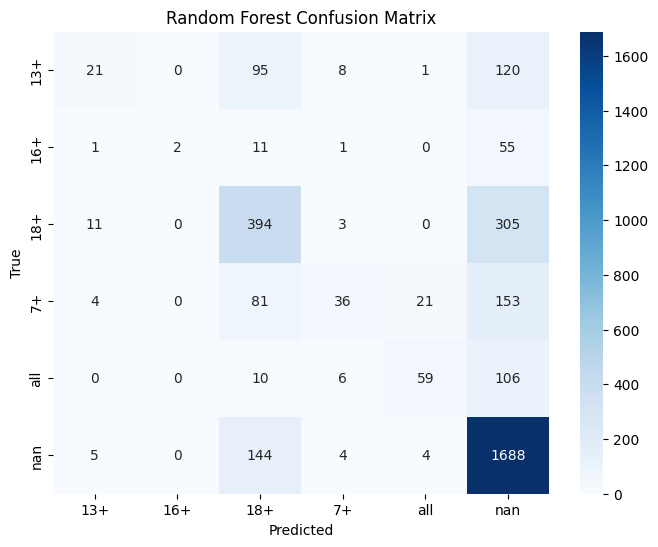

SVM Accuracy: 0.55
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       245
           1       0.00      0.00      0.00        70
           2       0.00      0.00      0.00       713
           3       0.00      0.00      0.00       295
           4       0.00      0.00      0.00       181
           5       0.55      1.00      0.71      1845

    accuracy                           0.55      3349
   macro avg       0.09      0.17      0.12      3349
weighted avg       0.30      0.55      0.39      3349

SVM Confusion Matrix:
[[   0    0    0    0    0  245]
 [   0    0    0    0    0   70]
 [   0    0    0    0    0  713]
 [   0    0    0    0    0  295]
 [   0    0    0    0    0  181]
 [   0    0    0    0    0 1845]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


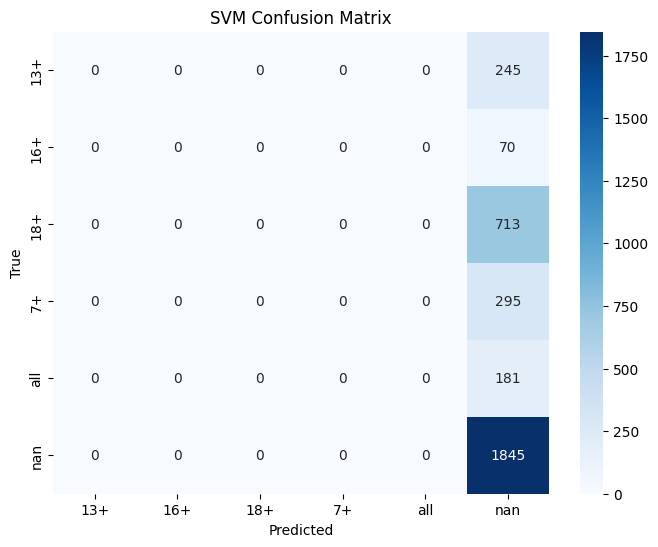

Decision Tree Accuracy: 0.51
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.18      0.21      0.19       245
           1       0.08      0.09      0.08        70
           2       0.41      0.42      0.41       713
           3       0.19      0.20      0.19       295
           4       0.29      0.25      0.27       181
           5       0.70      0.68      0.69      1845

    accuracy                           0.51      3349
   macro avg       0.31      0.31      0.31      3349
weighted avg       0.52      0.51      0.52      3349

Decision Tree Confusion Matrix:
[[  51    2   62   21    8  101]
 [   7    6   12    7    3   35]
 [  96   21  297   59   13  227]
 [  34    8   66   58   31   98]
 [   6    2   13   38   45   77]
 [  91   36  273  128   54 1263]]


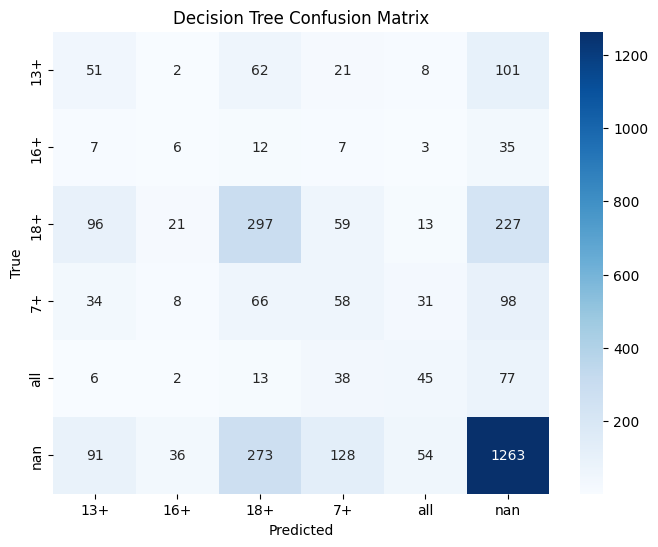

KNN Accuracy: 0.49
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.09      0.10       245
           1       0.06      0.01      0.02        70
           2       0.30      0.28      0.29       713
           3       0.18      0.09      0.12       295
           4       0.36      0.21      0.27       181
           5       0.62      0.74      0.67      1845

    accuracy                           0.49      3349
   macro avg       0.27      0.24      0.25      3349
weighted avg       0.45      0.49      0.47      3349

KNN Confusion Matrix:
[[  22    2   64   20    4  133]
 [   4    1   18    0    0   47]
 [  51    3  201   35    5  418]
 [  22    1   61   28   31  152]
 [  12    1   18   14   38   98]
 [  73    8  313   59   27 1365]]


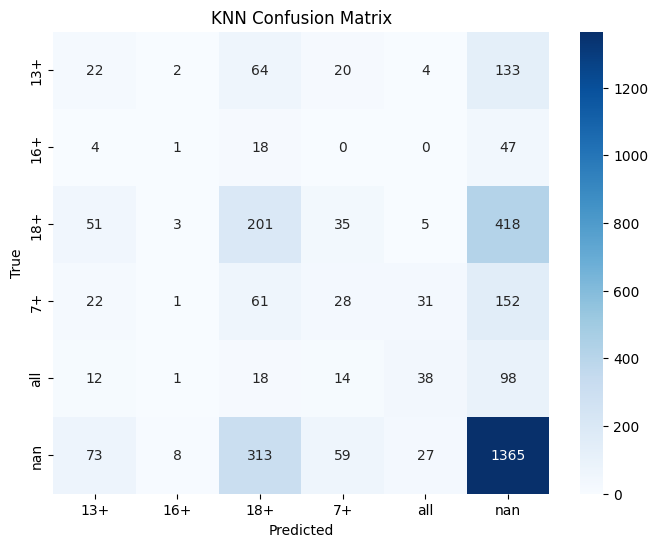

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
path = "/content/drive/MyDrive/SML AIML ASSIGNMENTS/AI-ML PROJECT/ott movies.csv"
df = pd.read_csv(path)

# Display the first few rows of the dataset
print(df.head())

# Convert categorical columns to numeric if necessary
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = df.drop('Age', axis=1)  # Replace 'target_column' with your actual target column name
y = df['Age']  # Replace 'target_column' with your actual target column name

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values (e.g., impute with mean)
for column in X_train.columns:
    X_train[column] = X_train[column].fillna(X_train[column].mean())
    X_test[column] = X_test[column].fillna(X_train[column].mean())

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}
#Corrected indentation for the for loop
for name, clf in classifiers.items():
    clf.fit(X_train,y_train) # Fixed x_train to X_train


    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"{name} Confusion Matrix:\n{cm}") # Fixed missing f-string formatting
    plt.figure(figsize=(8, 6))
    # Attempt to handle potential KeyError due to missing 'target_column'
    try:
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=label_encoders['Age'].classes_, # Changed 'target_column' to 'Age'
                    yticklabels=label_encoders['Age'].classes_) # Changed 'target_column' to 'Age'
    except KeyError:
        print("Warning: 'target_column' not found in label_encoders. Using default labels for heatmap.")
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()